# Requirements and Impots

In [1]:
pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap
import warnings
warnings.filterwarnings('ignore')

#  Data Summary


In [3]:
file_path = 'stroke-data.csv'
try:
    df = pd.read_csv(file_path)
    print(f"File '{file_path}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path and try again.")
    df = None
    
total_size = df.size
print("Total number of elements:", total_size)

File 'stroke-data.csv' loaded successfully.
Total number of elements: 61320


In [4]:
print("Preview of the Dataset (Head):")
display(df.head())

Preview of the Dataset (Head):


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
 print("\nSummary Statistics for Numerical Columns:")
 numerical_summary =df.describe(include=[float, int])
 display(numerical_summary)


Summary Statistics for Numerical Columns:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
 print("\nSummary Statistics for Categorical Columns:")
 categorical_summary= df.describe(include=[object])
 display(categorical_summary)


Summary Statistics for Categorical Columns:


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [7]:
print("\nNull Values in Each Column:")
null_values= df.isnull().sum()
display(null_values)


Null Values in Each Column:


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Missing values

In [8]:
# Fill missing values in numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()  
        df[col].fillna(mean_value, inplace=True)
        print(f"Filled missing values in numerical column '{col}' with the mean: {mean_value}")

Filled missing values in numerical column 'bmi' with the mean: 28.893236911794666


In [9]:
output_file_path = 'stroke-data_updated.csv'
# Save the updated DF to a CSV file
df.to_csv(output_file_path, index=False)
print(f"\dataset saved successfully to '{output_file_path}'")

\dataset saved successfully to 'stroke-data_updated.csv'


In [10]:
file_path = 'stroke-data_updated.csv'

total_size = df.size
print("Total number of elements:", total_size)

Total number of elements: 61320


In [11]:
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


# Label encoding and One-Hot Encoding

In [12]:
print(f"Initial size: {df.size} (rows: {len(df)}, cols: {len(df.columns)})")

# Drop ID column
df = df.drop('id', axis=1)

# Encode binary categorical columns
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

# One-hot encode multi-category columns
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], prefix=['work', 'smoke'])

df.rename(columns={
    'smoke_smokes': 'smoke',
    'smoke_formerly smoked': 'formerly_smoked',
    'work_Never_worked': 'Never_worked',
    'work_Govt_job': 'Govt_job',
    'work_Self-employed': 'Self-employed',
    'smoke_never smoked': 'never_smoked'
}, inplace=True)

print(f"Final size: {df.size} (rows: {len(df)}, cols: {len(df.columns)})")


Initial size: 61320 (rows: 5110, cols: 12)
Final size: 91980 (rows: 5110, cols: 18)


In [13]:
output_file_path = 'stroke-data_updated.csv'

df.to_csv(output_file_path, index=False)
print(f"\dataset saved successfully to '{output_file_path}'")

\dataset saved successfully to 'stroke-data_updated.csv'


In [14]:
total_size = df.size
print("Total number of elements:", total_size)

Total number of elements: 91980


In [15]:
# Select ONLY True/False columns (skip others)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [16]:
 print(df.head(8))

   gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0     1.0  67.0             0              1             1               1   
1     0.0  61.0             0              0             1               0   
2     1.0  80.0             0              1             1               0   
3     0.0  49.0             0              0             1               1   
4     0.0  79.0             1              0             1               0   
5     1.0  81.0             0              0             1               1   
6     1.0  74.0             1              1             1               0   
7     0.0  69.0             0              0             0               1   

   avg_glucose_level        bmi  stroke  Govt_job  Never_worked  work_Private  \
0             228.69  36.600000       1         0             0             1   
1             202.21  28.893237       1         0             0             0   
2             105.92  32.500000       1         0     

In [17]:
print(df.dtypes)

gender               float64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
Govt_job               int32
Never_worked           int32
work_Private           int32
Self-employed          int32
work_children          int32
smoke_Unknown          int32
formerly_smoked        int32
never_smoked           int32
smoke                  int32
dtype: object


In [18]:
df.to_csv(output_file_path, index=False)
print(f"\dataset saved successfully to '{output_file_path}'")

\dataset saved successfully to 'stroke-data_updated.csv'


# Outliers and visualization

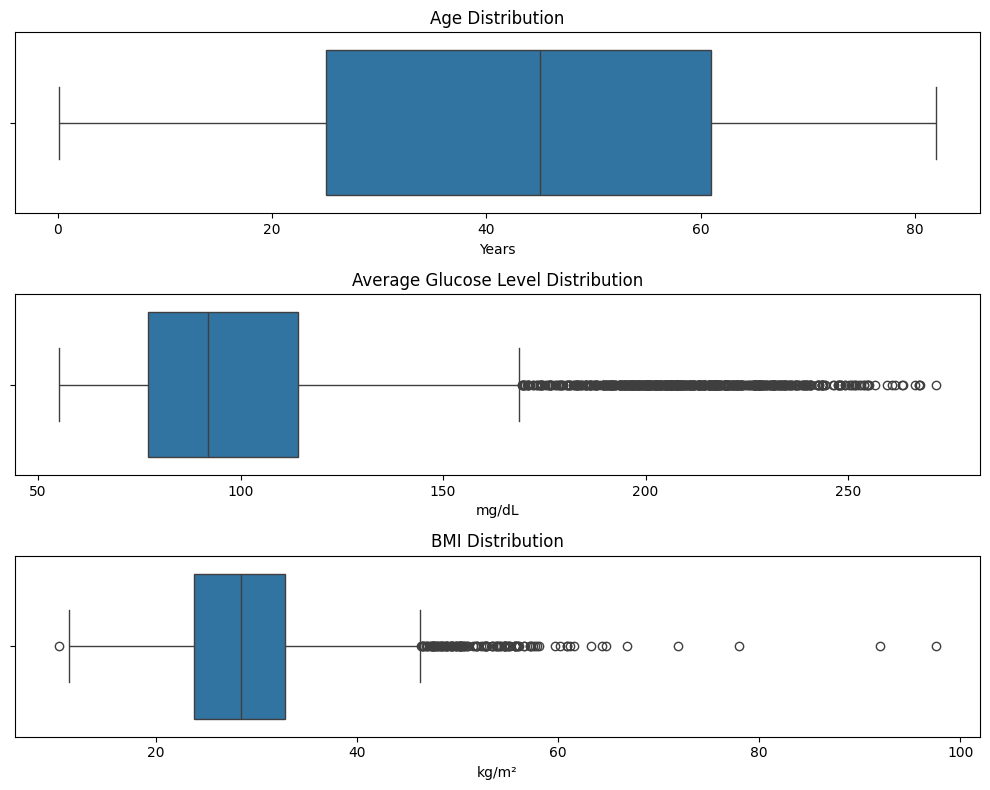

In [19]:
df = pd.read_csv('stroke-data_updated.csv')

plt.figure(figsize=(10, 8)) 

variables = ['age', 'avg_glucose_level', 'bmi']
titles = ['Age', 'Average Glucose Level', 'BMI']
units = ['Years', 'mg/dL', 'kg/m²']

for i, (var, title, unit) in enumerate(zip(variables, titles, units)):
    plt.subplot(3, 1, i+1)  
    sns.boxplot(x=df[var], orient='h')  
    plt.title(f'{title} Distribution')
    plt.xlabel(unit)
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [20]:
# Select only numerical columns (excluding boolean columns) for Z-score calculation
numerical_columns = df.select_dtypes(include=['float64', 'int64'], exclude=['bool']).columns

# Initialize a dictionary to store outlier counts
outliers_info = {}


In [21]:
from scipy.stats import zscore

# Manually exclude binary columns 
numerical_columns = [col for col in numerical_columns if len(df[col].unique()) > 2]

# Loop through each numerical column
for col in numerical_columns:
    # Calculate Z-scores for the column
    z_scores = zscore(df[col])

    # Identify outliers (where absolute Z-score > threshold)
    outliers = np.abs(z_scores) > 3

    # Get the count of outliers
    outlier_count = outliers.sum()

    # Store the outlier count in the dictionary
    outliers_info[col] = outlier_count

In [22]:
for col, outlier_count in outliers_info.items():
 print(f"Number of outliers in '{col}': {outlier_count}")

Number of outliers in 'gender': 0
Number of outliers in 'age': 0
Number of outliers in 'avg_glucose_level': 49
Number of outliers in 'bmi': 59


In [23]:
# Define the Z-score threshold
z_threshold = 3  


In [24]:
# Loop through each numerical column
for col in numerical_columns:
   
    z_scores = zscore(df[col])

    # Calculate the upper and lower bounds based on Z-threshold
    mean_value = df[col].mean()
    std_dev = df[col].std()
    lower_bound = mean_value - z_threshold * std_dev
    upper_bound = mean_value + z_threshold * std_dev

    # Identify outlier indices
    outlier_indices = df[(z_scores > z_threshold) | (z_scores < -z_threshold)].index

    if len(outlier_indices) > 0:
        # Take the first outlier for display purposes
        example_index = outlier_indices[0]
        before_value = df.loc[example_index, col]

        # Cap the outlier
        capped_value = upper_bound if before_value > upper_bound else lower_bound

        # Before and after values
        print(f"Column: '{col}'")
        print(f"- Before Capping (Row {example_index}): {before_value}")
        print(f"- After Capping: {capped_value}\n")

        # Apply capping to the entire column
        df[col] = np.where(df[col] > upper_bound, upper_bound,
                           np.where(df[col] < lower_bound, lower_bound, df[col]))
    else:
        print(f"Column: '{col}' has no outliers.\n")

Column: 'gender' has no outliers.

Column: 'age' has no outliers.

Column: 'avg_glucose_level'
- Before Capping (Row 33): 252.72
- After Capping: 241.9983575554641

Column: 'bmi'
- Before Capping (Row 113): 56.6
- After Capping: 51.98729039236591



In [25]:
df.to_csv(output_file_path, index=False)
print(f"\dataset saved successfully to '{output_file_path}'")

\dataset saved successfully to 'stroke-data_updated.csv'


In [26]:
# Drop only the row(s) where 'gender' is missing
df = df.dropna(subset=['gender'])

print("Remaining missing values:")
print(df.isnull().sum())

Remaining missing values:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
Govt_job             0
Never_worked         0
work_Private         0
Self-employed        0
work_children        0
smoke_Unknown        0
formerly_smoked      0
never_smoked         0
smoke                0
dtype: int64


In [27]:
df.to_csv(output_file_path, index=False)
print(f"\dataset saved successfully to '{output_file_path}'")

\dataset saved successfully to 'stroke-data_updated.csv'


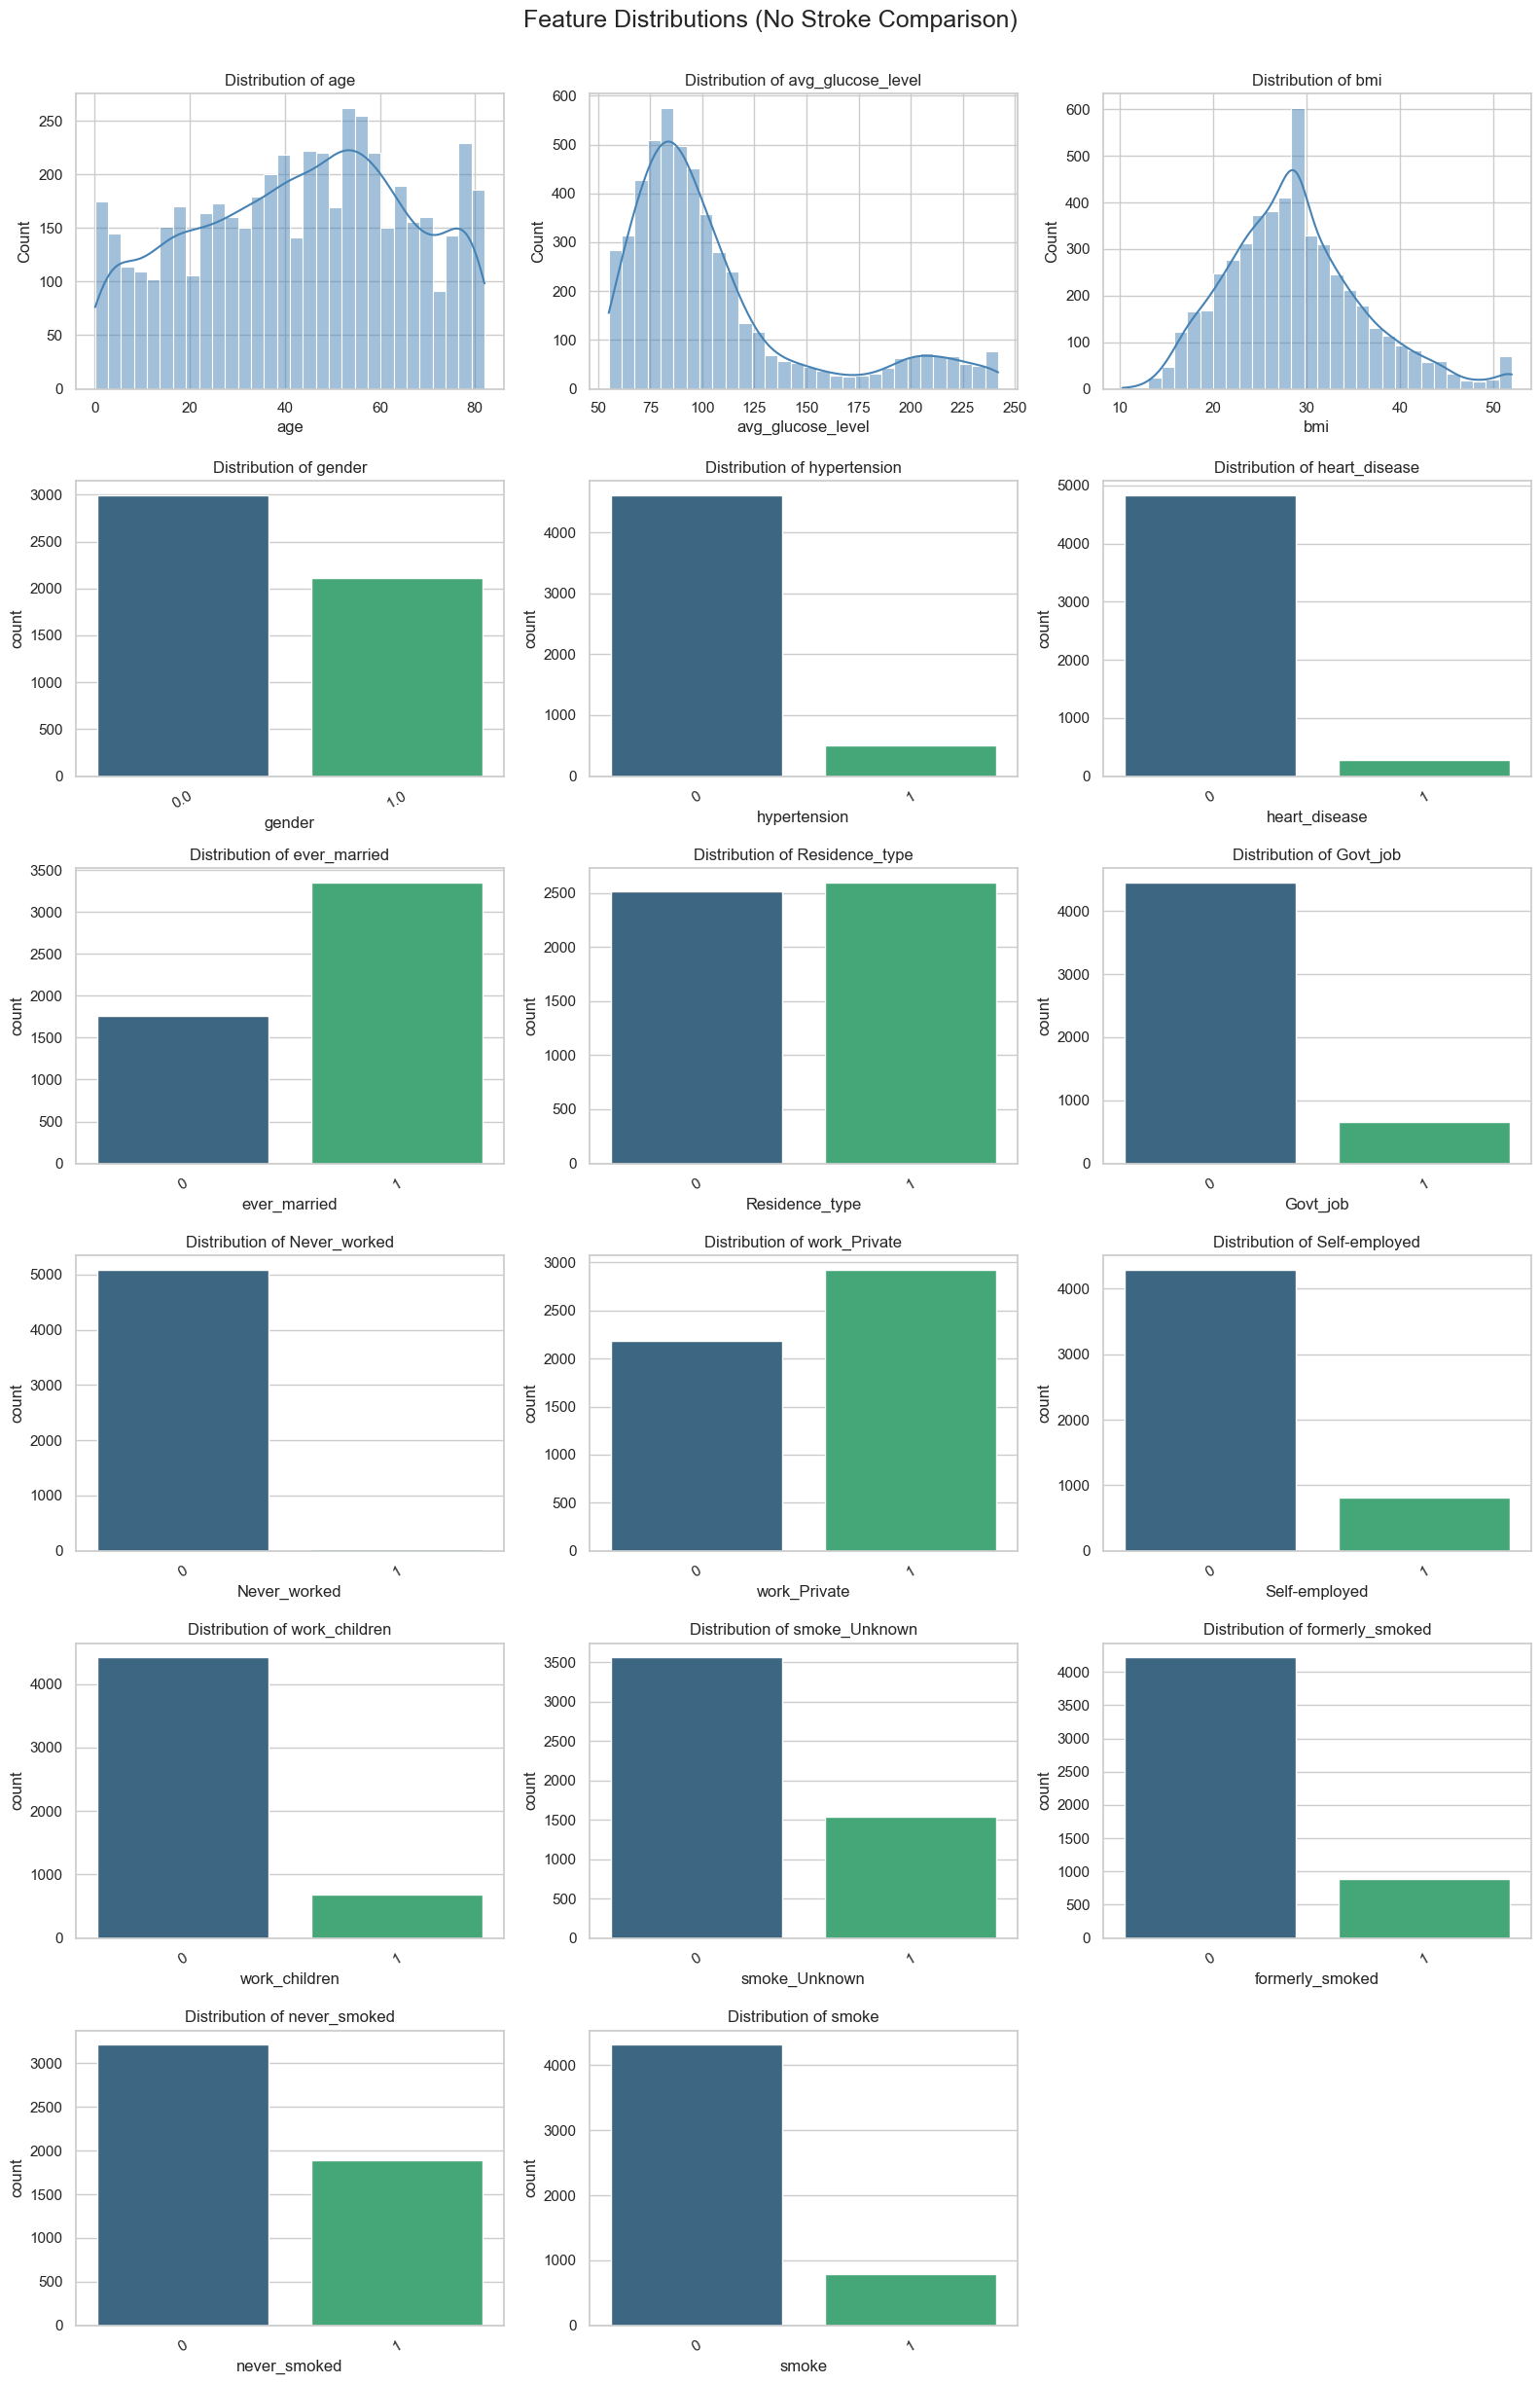

In [28]:
# ======================
# Feature Distributions Plot
# ======================

sns.set(style='whitegrid')
plt.figure(figsize=(16, 24))

# Continuous features
continuous_vars = ['age', 'avg_glucose_level', 'bmi']

categorical_vars = [
    'gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type',
    'Govt_job', 'Never_worked', 'work_Private', 'Self-employed', 'work_children',
    'smoke_Unknown', 'formerly_smoked', 'never_smoked', 'smoke'
]

# Plot continuous distributions
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')

# Plot categorical counts
for i, col in enumerate(categorical_vars, len(continuous_vars) + 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.suptitle("Feature Distributions (No Stroke Comparison)", fontsize=18, y=1.02)
plt.show()


In [29]:
max_samples = 5109  

df_sampled = df.copy()
print(f"Using the full dataset of {len(df)} rows.")

# Separate numerical and categorical columns
numerical_columns = df_sampled.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_sampled.select_dtypes(include=['object']).columns




Using the full dataset of 5109 rows.


In [30]:
# Standardize numerical data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(df_sampled[numerical_columns])

# Encode categorical data using one-hot encoding
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
categorical_data_encoded = encoder.fit_transform(df_sampled[categorical_columns])

# Combine numerical and categorical data (sparse + dense)
combined_data = hstack([numerical_data_scaled, categorical_data_encoded])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(combined_data.toarray())  # Convert sparse matrix to dense

# K-Means clustering (optional for clustering visualization)
n_clusters = 5 
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_embedding)

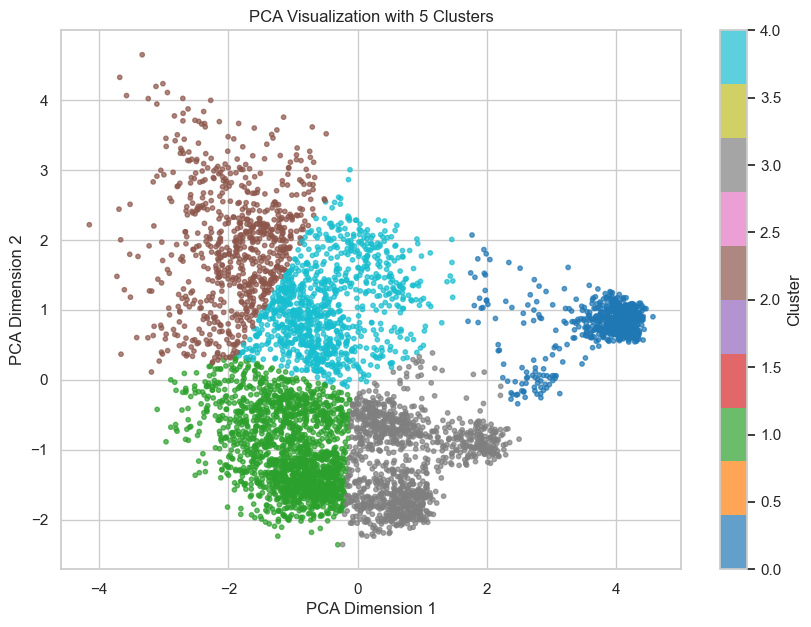

In [31]:
# Visualization of PCA embedding with cluster labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    pca_embedding[:, 0], pca_embedding[:, 1], c=cluster_labels, cmap='tab10',
    alpha=0.7, s=10
)
plt.title(f'PCA Visualization with {n_clusters} Clusters')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

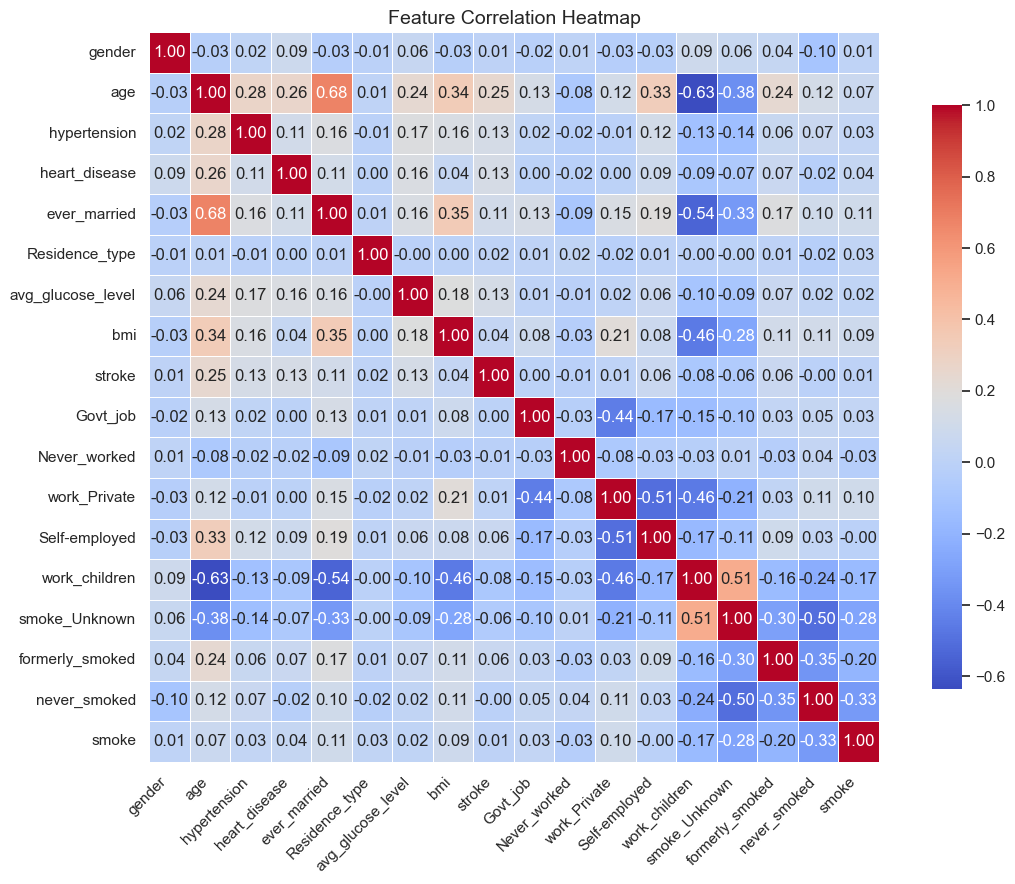

In [32]:
X = pd.read_csv("stroke-data_updated.csv")  

corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={'shrink': .8}, linewidths=0.5)

plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Machine learning with undersampling 

In [33]:
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv("stroke-data_updated.csv")
X = df.drop('stroke', axis=1)
y = df['stroke']

# Count actual class distribution
minority_class_count = y.value_counts()[1]  

# Set sampling strategy to undersample majority class to match minority class
rus = RandomUnderSampler(sampling_strategy={0: minority_class_count, 1: minority_class_count}) 
X_bal, y_bal = rus.fit_resample(X, y)

# Create new DataFrame
df_undersampled = pd.DataFrame(X_bal, columns=X.columns)
df_undersampled['stroke'] = y_bal

# Save to CSV
df_undersampled.to_csv("stroke-data-undersampled.csv", index=False)
print(" Saved balanced undersampled dataset as 'stroke-data-undersampled.csv'")



 Saved balanced undersampled dataset as 'stroke-data-undersampled.csv'


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    accuracy_score, cohen_kappa_score, confusion_matrix,
    mean_squared_error, mean_absolute_error, roc_curve
)

# Data Preparation

df = pd.read_csv("stroke-data-undersampled.csv")
X = df.drop('stroke', axis=1)
y = df['stroke']

# Print class distribution
print("="*50)
print("Original Class Distribution:")
print(y.value_counts(normalize=True))
print("="*50)

print(X.head())


Original Class Distribution:
stroke
0    0.5
1    0.5
Name: proportion, dtype: float64
   gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0     1.0  66.0             0              0             1               0   
1     0.0  47.0             0              0             1               1   
2     0.0  54.0             0              1             1               1   
3     0.0  64.0             0              0             1               1   
4     1.0  24.0             0              0             0               0   

   avg_glucose_level   bmi  Govt_job  Never_worked  work_Private  \
0              55.23  28.9         0             0             0   
1              73.00  20.6         0             0             0   
2             140.28  37.1         0             0             1   
3              95.87  19.3         0             0             1   
4              91.21  28.1         0             0             1   

   Self-employed  work_children  sm

In [35]:
# ======================
# Define Evaluation Functions
# ======================


def find_optimal_threshold(y_true, y_proba):
    thresholds = np.arange(0.1, 1.0, 0.01)
    best_f1 = 0
    best_threshold = 0.5
    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold

def evaluate_model(y_true, y_pred, y_proba=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba) if y_proba is not None else np.nan,
        'Kappa': cohen_kappa_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_proba)) if y_proba is not None else np.nan,
        'RAE': mean_absolute_error(y_true, y_proba) if y_proba is not None else np.nan,
        'SSE': np.sum((y_true - y_proba) ** 2) if y_proba is not None else np.nan
    }
    return metrics

In [36]:
# ======================
# Model Setup
# ======================
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=0.5),
    "Random Forest": RandomForestClassifier(n_estimators=250, max_depth=None),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, learning_rate=0.1),
    "SVM": SVC(probability=True, C=0.5, kernel='rbf')
}

In [37]:
# ======================
# Cross-Validation
# ======================
skf = StratifiedKFold(n_splits=10, shuffle=True) 
cv_results = []
conf_matrix_totals = {model: np.zeros((2, 2), dtype=int) for model in models}
roc_data = {model: {'fpr': [], 'tpr': [], 'auc': []} for model in models}

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Apply undersampling
    rus = RandomUnderSampler(random_state= None)
    X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

    for name, model in models.items():
        model.fit(X_train_bal, y_train_bal)
        y_proba = model.predict_proba(X_test)[:, 1]
        threshold = find_optimal_threshold(y_test, y_proba)
        y_pred = (y_proba >= threshold).astype(int)

        metrics = evaluate_model(y_test, y_pred, y_proba)
        metrics.update({
            'Model': name,
            'Fold': fold + 1,
            'Threshold': threshold
        })
        cv_results.append(metrics)

        # Save confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        conf_matrix_totals[name] += cm

        # Collect ROC curve data
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_data[name]['fpr'].append(fpr)
        roc_data[name]['tpr'].append(tpr)
        roc_data[name]['auc'].append(roc_auc_score(y_test, y_proba))


10-Fold CV Evaluation with Undersampling (Without random_state -> results slightly vary each time):
                     Accuracy  Precision  Recall     F1  ROC AUC  Kappa  \
Model                                                                     
Logistic Regression     0.811      0.759   0.920  0.830    0.847  0.622   
Random Forest           0.777      0.724   0.908  0.804    0.826  0.554   
SVM                     0.807      0.770   0.884  0.821    0.851  0.614   
XGBoost                 0.773      0.728   0.892  0.798    0.821  0.547   

                      RMSE    RAE    SSE  Threshold  
Model                                                
Logistic Regression  0.399  0.311  7.932      0.367  
Random Forest        0.412  0.332  8.479      0.376  
SVM                  0.397  0.317  7.891      0.417  
XGBoost              0.433  0.294  9.380      0.269  


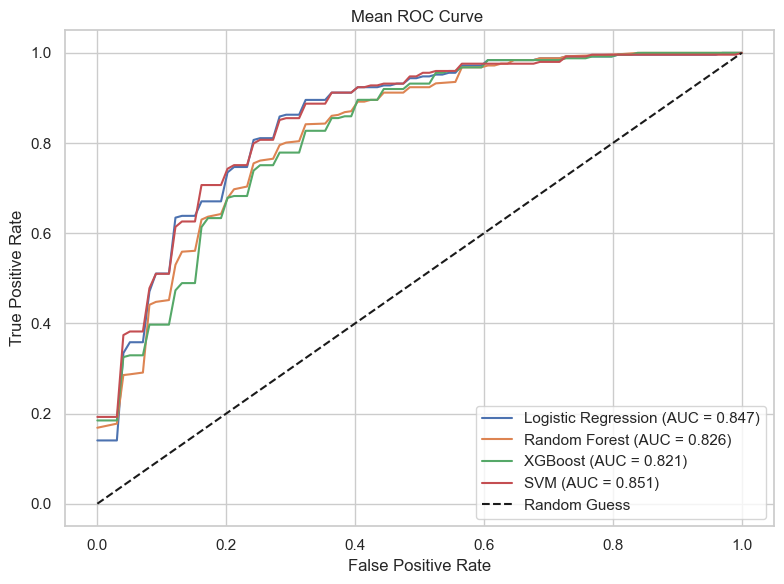

In [38]:
# ======================
# Show Evaluation Metrics
# ======================
cv_results_df = pd.DataFrame(cv_results)
avg_results = cv_results_df.groupby('Model').mean().drop(columns='Fold')
print("\n" + "="*60)
print("10-Fold CV Evaluation with Undersampling (Without random_state -> results slightly vary each time):")
print(avg_results.round(3))

# ======================
# Plot ROC Curve 
# ======================
plt.figure(figsize=(8, 6))  
for model_name, data in roc_data.items():
    # Average FPR and TPR across folds 
    all_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(all_fpr)

    for fpr, tpr in zip(data['fpr'], data['tpr']):
        fpr = np.concatenate([[0], fpr, [1]])
        tpr = np.concatenate([[0], tpr, [1]])
        mean_tpr += np.interp(all_fpr, fpr, tpr)

    mean_tpr /= len(data['tpr'])

    auc_mean = np.mean(data['auc'])
    plt.plot(all_fpr, mean_tpr, label=f"{model_name} (AUC = {auc_mean:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("Mean ROC Curve ")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Machine Learning visualization and confuzion matrix

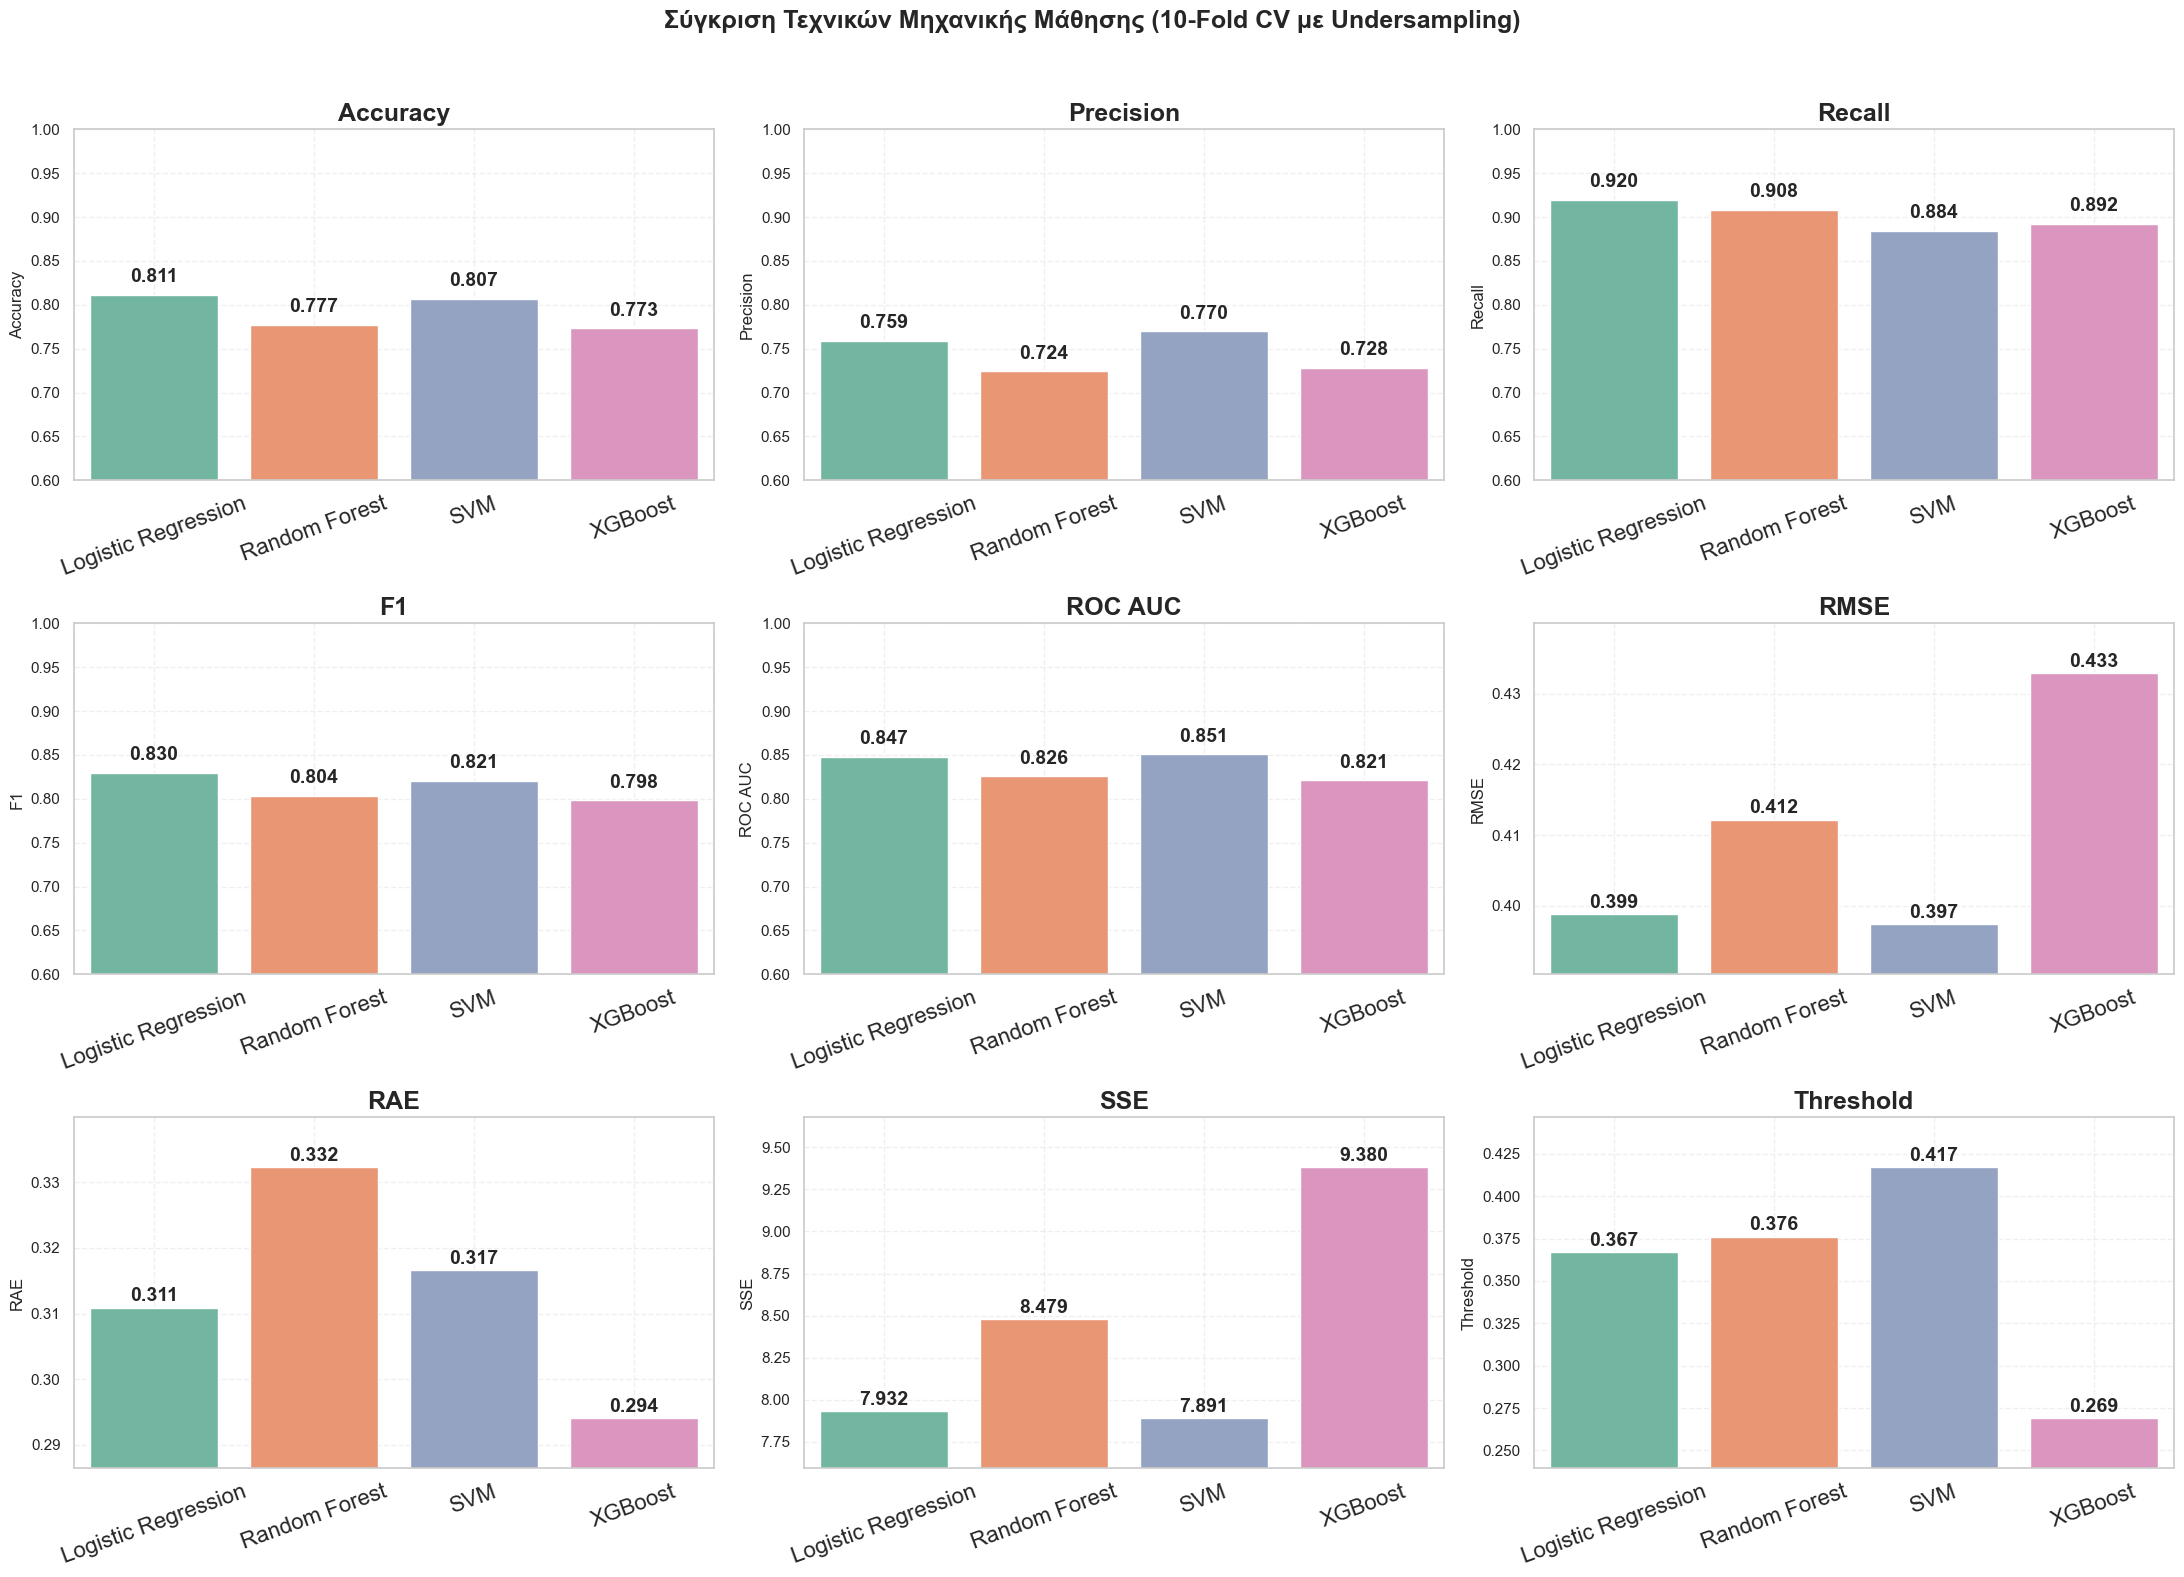

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_data = cv_results_df.groupby("Model").mean(numeric_only=True).reset_index()

main_metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
extra_metrics = ['RMSE', 'RAE', 'SSE', 'Threshold']
colors = sns.color_palette("Set2", n_colors=4)

plt.figure(figsize=(22, 15))

for i, metric in enumerate(main_metrics):
    plt.subplot(3, 3, i + 1)
    ax = sns.barplot(data=plot_data, x='Model', y=metric, palette=colors)
    ax.set_xlabel('')
    plt.title(f'{metric}', fontsize=18, weight='bold')  
    plt.xticks(rotation=20, fontsize=16)                
    plt.yticks(fontsize=11)
    plt.ylim(0.6, 1.0)
    plt.grid(True, linestyle='--', alpha=0.3)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.3f}',
                ha='center', va='bottom', fontsize=14, fontweight='bold')  
        
for j, metric in enumerate(extra_metrics):
    plt.subplot(3, 3, len(main_metrics) + j + 1)
    ax = sns.barplot(data=plot_data, x='Model', y=metric, palette=colors)
    ax.set_xlabel('')
    plt.title(f'{metric}', fontsize=18, weight='bold')
    plt.xticks(rotation=20, fontsize=16)
    plt.yticks(fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.3)
    metric_min = plot_data[metric].min()
    metric_max = plot_data[metric].max()
    margin = (metric_max - metric_min) * 0.2
    plt.ylim(metric_min - margin, metric_max + margin)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + margin * 0.05, f'{height:.3f}',
                ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.suptitle("Σύγκριση Τεχνικών Μηχανικής Μάθησης (10-Fold CV με Undersampling)", 
             fontsize=18, weight='bold', y=1.05)  
plt.show()



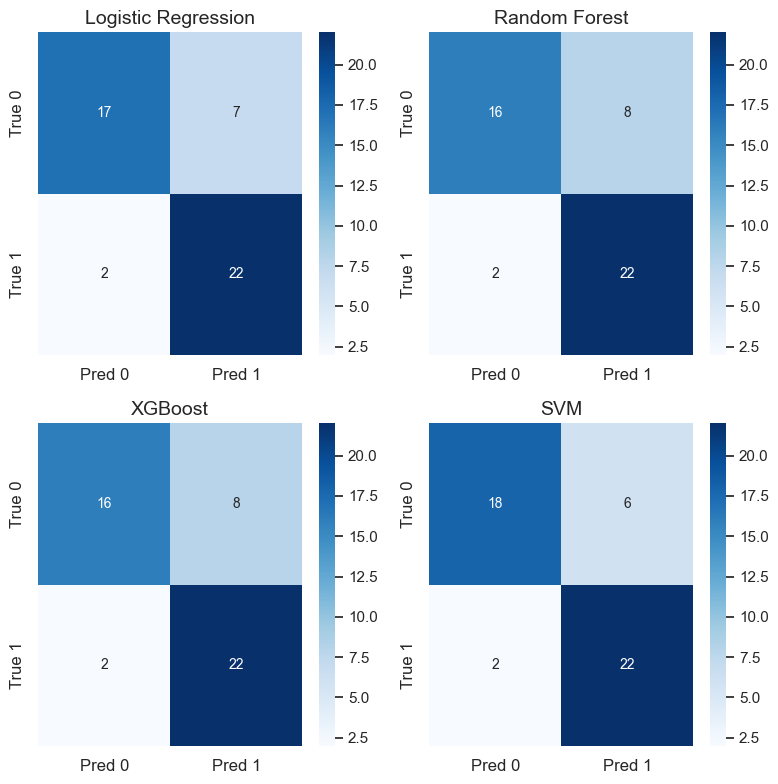

In [40]:
# ======================
# Plot Confusion Matrices
# ======================

plt.rcParams.update({'font.size': 12})

model_names = list(conf_matrix_totals.keys())
n_models = len(model_names)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))  

axes = axes.flatten()  
for idx, model_name in enumerate(model_names):
    avg_cm = conf_matrix_totals[model_name] // skf.get_n_splits()
    ax = axes[idx]
    sns.heatmap(avg_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'],
                ax=ax,
                annot_kws={"size": 10})  
    ax.set_title(f'{model_name}', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)


for j in range(len(model_names), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




# Comparison of Different Machine Learning Techniques

In this study, four popular algorithms were evaluated:

- **Logistic Regression**  
- **Random Forest**  
- **Support Vector Machine (SVM)**  
- **XGBoost**

---

## Performance Metrics

### Accuracy  
**Logistic Regression** achieved the highest accuracy (**0.811**), followed closely by **SVM (0.807)**, indicating strong overall predictive performance.

### Precision  
**SVM (0.770)** and **Logistic Regression (0.759)** led in precision, showing better ability to reduce **false positives**, important for stroke diagnoses.

### Recall  
**Logistic Regression** had the highest recall (**0.920**), followed by **Random Forest (0.908)** and **XGBoost (0.892)**, making them effective at identifying most stroke cases.

### F1 Score  
**Logistic Regression (0.830)** had the best balance between precision and recall, followed closely by **SVM (0.821)**.

### ROC AUC  
**SVM (0.851)** had the highest ROC AUC, showing superior capability to distinguish between stroke and non-stroke cases.

### Cohen's Kappa  
**Logistic Regression (0.622)** and **SVM (0.614)** scored highest, reflecting strong agreement between predicted and actual classifications beyond chance.

### Error Metrics  
- **SVM** had the **lowest RMSE (0.397)** and **lowest SSE (7.891)**, suggesting more accurate continuous probability estimates.
- **Logistic Regression** also performed well with **RMSE = 0.399** and **SSE = 7.932**.

---

## Conclusion

- **Logistic Regression** offers the best combination of **recall**, **F1 score**, and **accuracy**, while remaining highly **interpretable**, making it an excellent choice for medical applications like stroke prediction.

- **SVM** demonstrated the **best ROC AUC** and **lowest RMSE**, making it ideal for distinguishing subtle patterns and minimizing prediction error.

- **Random Forest** and **XGBoost** performed well but were slightly behind in key metrics. However, **Random Forest** may still be favored when **model robustness** and **feature importance** are important.

---

## Model Selection Guidance

- If **maximizing recall** or **reducing false negatives** is essential (e.g., for stroke detection), **Logistic Regression** is recommended.

- If **decision boundary performance** and **probability estimates** are prioritized, **SVM** is a strong contender.

- For **robustness** and **nonlinear feature interactions**, **Random Forest** is a good general-purpose choice.

- If we're looking for **fine-tuned performance** and are ready to invest in **hyperparameter optimization**, **XGBoost** is the optimal choice .

